# Principial Component Analysis

PCA is the main application of Singular Value Decomposition in Data Science. It is mainly known for being used in Dimensionality reduction, but it is also fundamental for many other complex problems in ML. I highly recommend following resources, to get intuition about SVD and PCA:

SVD: https://www.youtube.com/watch?v=P5mlg91as1c&list=PLLssT5z_DsK9JDLcT8T62VtzwyW9LNepV&index=47                               
PCA: https://www.youtube.com/watch?v=FgakZw6K1QQ

#### Formula for SVD:  $$A = U\Sigma V^T$$
$U$ - contains eigenvectors of $AA^T$      (Because $AA^T=(U\Sigma V^T)^TU\Sigma V^T = U\Sigma^2 U^T$

$\Sigma $ - contains singular values of A ($\sigma_i = \sqrt\lambda_i$ where $\lambda_i$ is eigenvalues of $A^TA$ and $AA^T$)

$V$ - contains eigenvectors of $A^TA$      (Because $A^TA=U\Sigma V^T(U\Sigma V^T)^T = V\Sigma^2 V^T$

PCA uses this formula in slighly different way. Before applying PCA to any dataset we are subracting mean of each variable from corresponding entries which is for computing Covariance matrix. If each column of A represents one variable then $A^TA$ will give information about relation between our vairables and after dividing result by $n-1$ we will call this matrix as Covariance matrix: $$S = \frac{A^TA}{n-1}$$

Eigenvalues of this matrix will tell us how much variance each Principal Component explains. Usually a few PC-s together explain more than 90-95% of total variance, and by removing remaining components we will not face significant information loss. By contrast modelling new dataset will be faster and if we could reduce dataset to 2d, we will also be able to visualize it.

### Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Our Dataset

Has 3 variables age, height and weight.

In [2]:
data = np.array([[12,160,48],[13,162,48],[14,165,52],[15,163,54],[15,169,56],[13,163,50],[14,163,51],[16,168,55],[17,166,55],[18,171,58],[11,159,47],[16,163,53],[16,163,53],[18,173,66],[11,160,50],[16,163,53],[17,163,55],[12,168,59],[13,163,53],[16,170,64],[14,166,51],[18,175,59]])
data

array([[ 12, 160,  48],
       [ 13, 162,  48],
       [ 14, 165,  52],
       [ 15, 163,  54],
       [ 15, 169,  56],
       [ 13, 163,  50],
       [ 14, 163,  51],
       [ 16, 168,  55],
       [ 17, 166,  55],
       [ 18, 171,  58],
       [ 11, 159,  47],
       [ 16, 163,  53],
       [ 16, 163,  53],
       [ 18, 173,  66],
       [ 11, 160,  50],
       [ 16, 163,  53],
       [ 17, 163,  55],
       [ 12, 168,  59],
       [ 13, 163,  53],
       [ 16, 170,  64],
       [ 14, 166,  51],
       [ 18, 175,  59]])

### Step 1: Standardize Data

In [3]:
#Making Zero Mean
data_centered = (data - np.mean(data, axis=0))
#Feature Scaling (mean is already zero, therefore we are not subtracting it)
data_normalized= data_centered/np.std(data, axis=0)

<b>Note:</b> Scikit-Learn explains why standarizing is important before appliying PCA: https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html

### Visualization

Text(0.5, 0, 'weight')

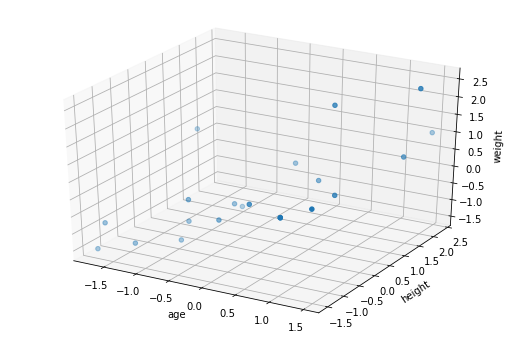

In [4]:
#Visualization
fig = plt.figure(figsize=(9, 6))
# Create 3D container
ax = plt.axes(projection = '3d')
# Visualize 3D scatter plot
ax.scatter3D(data_normalized[:,0], data_normalized[:,1], data_normalized[:,2])
# Give labels
ax.set_xlabel('age')
ax.set_ylabel('height')
ax.set_zlabel('weight')

### Step 2: Computing Covariance Matrix

In [5]:
#Covariance matrix for variables: age and height. AA.T
cov_mat = data_normalized.T@data_normalized/(data_normalized.shape[0]-1)
cov_mat

array([[1.04761905, 0.72359485, 0.70380246],
       [0.72359485, 1.04761905, 0.89388529],
       [0.70380246, 0.89388529, 1.04761905]])

### Step 3: Finding Eigenvalues and Eigenvectors of the Covariance matrix

In [6]:
np.linalg.eigh(cov_mat)
eig_vals=np.linalg.eigh(cov_mat)[0]
eig_vecs=np.linalg.eigh(cov_mat)[1]

#Here eig function returned eigenvalues in descending order, our biggest eigen value is second one
#and corresponding eigenvector is second column of the V

### Step 4: Reordering eigenvalues and corresponding eigenvectors in order of importance.

In [7]:
#sort the eigenvalues in descending order
sorted_index = np.argsort(eig_vals)[::-1]
 
eigvals = eig_vals[sorted_index]

#eigvals as sigma

eigvals = eigvals*np.eye(3,3)
#similarly sort the eigenvectors 
eigvecs = eig_vecs[:,sorted_index]

In [8]:
eigvals

array([[2.59843754, 0.        , 0.        ],
       [0.        , 0.3912888 , 0.        ],
       [0.        , 0.        , 0.1531308 ]])

In [9]:
eigvecs

array([[-0.54549561, -0.83700833,  0.04303026],
       [-0.59483993,  0.35047897, -0.72341548],
       [-0.59042358,  0.42021608,  0.68907071]])

### Step 5: Calculating Principial Components

In [10]:
data_normalized@eigvecs

array([[ 2.20205898,  0.08799569, -0.02880131],
       [ 1.66711727, -0.12995974, -0.35424515],
       [ 0.49275486,  0.08978216, -0.27171712],
       [ 0.27684535, -0.28567094,  0.38363268],
       [-0.82355033,  0.39315658, -0.36181303],
       [ 1.27643553,  0.13070518, -0.23657118],
       [ 0.90100991, -0.16599908, -0.0716182 ],
       [-0.8082942 , -0.16421261, -0.31453402],
       [-0.77546476, -0.71669812,  0.05051788],
       [-2.10934326, -0.41820738, -0.35735091],
       [ 2.71942737,  0.30106744, -0.02113035],
       [ 0.15015869, -0.75940762,  0.25828776],
       [ 0.15015869, -0.75940762,  0.25828776],
       [-3.38818466,  0.45718729,  0.45859284],
       [ 2.20437615,  0.65024857,  0.24169257],
       [ 0.15015869, -0.75940762,  0.25828776],
       [-0.34963639, -0.96759568,  0.56838969],
       [-0.30154758,  1.73073409,  0.18684569],
       [ 0.90332709,  0.3962538 ,  0.19887568],
       [-2.21150507,  0.79969826,  0.64655869],
       [ 0.47518155,  0.08489847, -0.589

### How much variance is explained by PC1, PC2, and PC3?

In [11]:
Total_var = sum(eig_vals)
PC1_var = (eigvals[0,0]/Total_var)*100
PC2_var = (eigvals[1,1]/Total_var)*100
PC3_var = (eigvals[2,2]/Total_var)*100

print('PC1 explains {}%, PC2 explains {}%, PC3 explains {}% of total variation'.format(round(PC1_var,2),round(PC2_var,2),round(PC3_var,2)))

PC1 explains 82.68%, PC2 explains 12.45%, PC3 explains 4.87% of total variation


#### PC1 and PC2 together explains 95.13% of total variation which more than enough for us. So, we can just use first two components.

### Step 6: Represent data in the lower dimension.

In [12]:
Reduced_data = data_normalized@eigvecs[:,:2]

Text(0, 0.5, 'PC2')

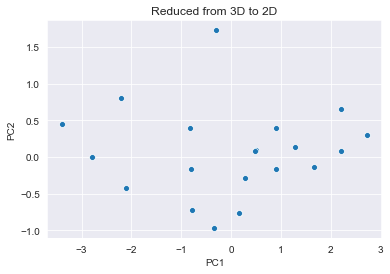

In [13]:
#Visualizing standrized version
sns.set_style('darkgrid')
sns.scatterplot(x=Reduced_data[:,0],y=Reduced_data[:,1])
plt.title('Reduced from 3D to 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')

# All process in one function

In [14]:
def PCA(data, n_components=2):
    data_normalized = (data-np.mean(data,axis=0))/np.std(data, axis=0)
    
    cov_mat = (data_normalized.T@data_normalized)/(data_normalized.shape[0]-1)
    
    eig_vals = np.linalg.eigh(cov_mat)[0]
    eig_vecs = np.linalg.eigh(cov_mat)[1]
    
    eig_vals = eig_vals[::-1]
    eig_vecs = eig_vecs[:,::-1]
    
    reduced_data = data_normalized@eig_vecs[:,:n_components]
    
    return reduced_data

In [15]:
import pandas as pd
 
#Get the IRIS dataset
iris = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data") 
 
#prepare the data
x = iris.iloc[:,0:4]
 
#prepare the target
target = iris.iloc[:,4]
 
#Applying PCA to iris dataset
iris_reduced = PCA(x,2)

Text(0, 0.5, 'PC2')

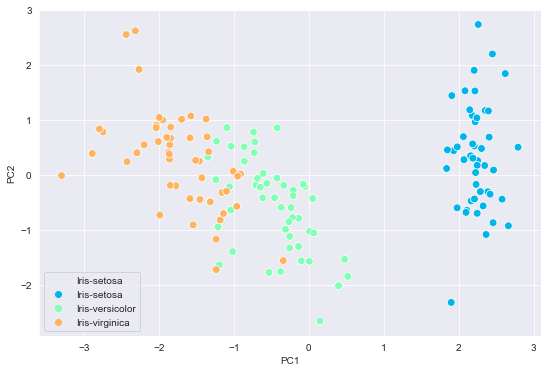

In [19]:
plt.figure(figsize = (9,6))
sns.scatterplot(x = iris_reduced[0],y = iris_reduced[1], hue=target, s = 60 , palette= 'rainbow')
plt.xlabel('PC1')
plt.ylabel('PC2')